# Notebook for creating Pie charts of the target variable distributions

In [10]:
from typing import List

import pandas as pd
from pandas import DataFrame
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

sns.set_style("white")

mongo_client = MongoClient("127.0.0.1")

mongo_db = mongo_client["nvd"]
mongo_collection = mongo_db["nvd_all"]

In [11]:
all_descriptions: List = list(mongo_collection.aggregate([
    {

        '$unwind': {
            'path': '$description'
        }
    },
    {
        '$match': {
            'cvssv3': { "$nin": [ 'None', "" ] }
        }
    },
    {
        '$project': {
            'year': 0,
            'reference_data': 0,
            'cwe': 0,
            'references': 0,
            'cpe': 0,
            'cvssv2': 0,
        }
    }
]))
len(all_descriptions)

88979

In [12]:
all_refs: List = list(mongo_collection.aggregate([
    {
        '$unwind': {
            'path': '$reference_data'
        }
    }, {
        '$replaceRoot': {
            'newRoot': {
                '$mergeObjects': [
                    '$$ROOT', '$reference_data'
                ]
            }
        }
    }, {
        '$project': {
            'reference_data': 0,
            'cpe': 0,
            'cvssv2': 0,
            'cwe': 0,
            'references': 0
        }
    }, {
        '$match': {
            'text_selenium': {
                '$exists': True
            }
        }
    }, {
        '$match': {
            'cvssv3': { "$nin": [ 'None', "" ] }
        }
    }
]))
len(all_refs)

12755

In [13]:
def unpack_cvss(rows: List) -> List[List[str]]:
    append_rows: List[List[str]] = []
    for row in rows:
        id = row['_id']
        cvss = row['cvssv3']
        cvss_arr: List[str] = cvss.split('/')
        av: str = cvss_arr[1].replace('AV:', '')
        ac: str = cvss_arr[2].replace('AC:', '')
        pr: str = cvss_arr[3].replace('PR:', '')
        ui: str = cvss_arr[4].replace('UI:', '')
        s: str = cvss_arr[5].replace('S:', '')
        c: str = cvss_arr[6].replace('C:', '')
        i: str = cvss_arr[7].replace('I:', '')
        a: str = cvss_arr[8].replace('A:', '')
        score: float = float(cvss_arr[9].replace('Score:', ''))
        append_rows.append([id, av, ac, pr, ui, s, c, i, a, score])
    return append_rows

In [14]:
all_rows: List = unpack_cvss(all_refs) + unpack_cvss(all_descriptions)
df = pd.DataFrame(all_rows, columns=['id', 'av', 'ac', 'pr', 'ui', 's', 'c', 'i', 'a', 'score'])
df.shape

(101734, 10)

In [15]:
len(pd.unique(df['id']))

88979

  av  number
0  A    2539
1  L   25435
2  N   72658
3  P    1102


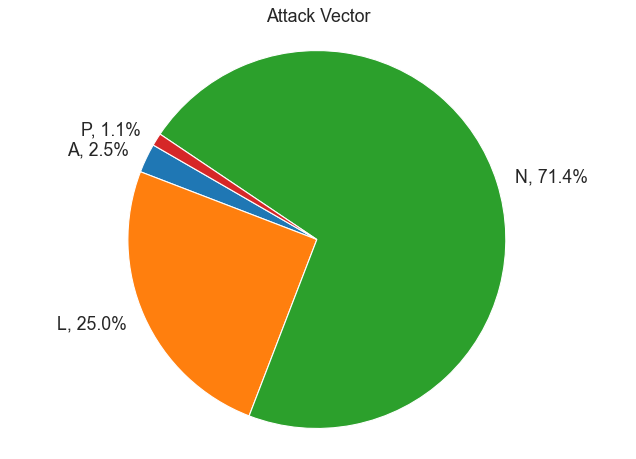

  av  number
0  A    2539
1  L   25435
2  N   72658
3  P    1102


In [36]:
df_av: DataFrame = df.groupby(by=['av']).size().reset_index(name="number")
labels = df_av['av']
su = sum(df_av['number'])
labels = [f'{l}, {(s/su)*100:1.1f}%' for l, s in zip(labels, df_av['number'])]

print(df_av.head())

fig, ax = plt.subplots(figsize=(10,7), dpi= 80)
ax.pie(df_av['number'], labels=labels, textprops={'fontsize': 16}, startangle=150)
#_, _, autotext = plt.pie(df_av['number'], labels=labels, autopct='%1.1f%%', startangle=15)
#for t in autotext:
#    t.set_color('white')
plt.title('Attack Vector', fontsize=16)
plt.axis('equal')
#plt.legend(title='Attack Vector', labels=labels,)
plt.savefig('../assets/distribution_pies/av_distribution.png')
plt.show()

print(df_av)

  ac  number
0  H    7316
1  L   94418


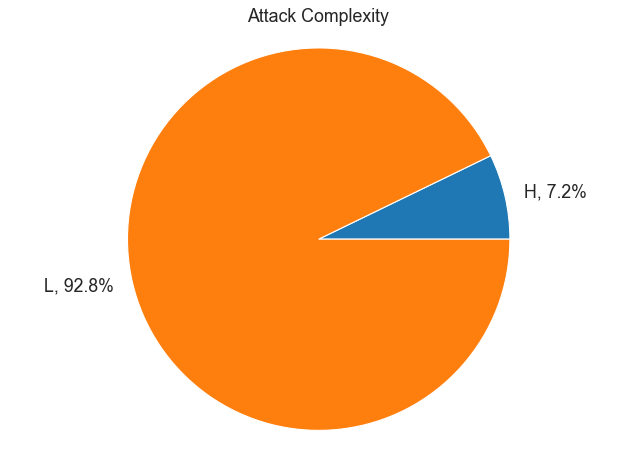

  ac  number
0  H    7316
1  L   94418


In [17]:
df_ac: DataFrame = df.groupby(by=['ac']).size().reset_index(name="number")
labels = df_ac['ac']
su = sum(df_ac['number'])
labels = [f'{l}, {(s/su)*100:1.1f}%' for l, s in zip(labels, df_ac['number'])]

print(df_ac.head())

fig, ax = plt.subplots(figsize=(10,7), dpi= 80)
ax.pie(df_ac['number'], labels=labels, textprops={'fontsize': 16})
#_, _, autotext = plt.pie(df_ac['number'], labels=labels, autopct='%1.1f%%', startangle=15)
#for t in autotext:
#    t.set_color('white')
plt.title('Attack Complexity', fontsize=16)
plt.axis('equal')
#plt.legend(title='Attack Vector', labels=labels,)
plt.savefig('../assets/distribution_pies/ac_distribution.png')
plt.show()

print(df_ac)

  pr  number
0  H    7681
1  L   28983
2  N   65070


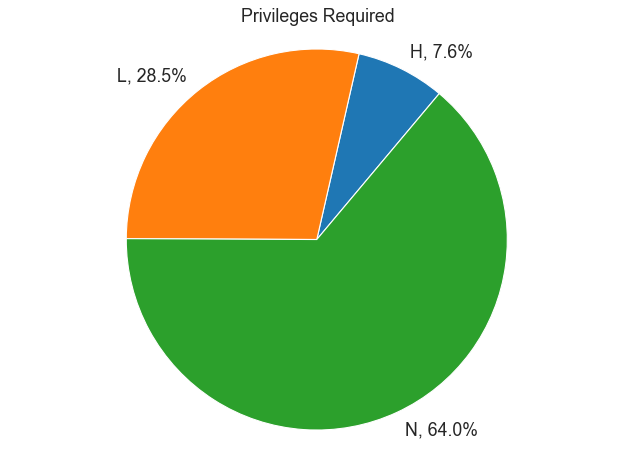

  pr  number
0  H    7681
1  L   28983
2  N   65070


In [18]:
df_pr: DataFrame = df.groupby(by=['pr']).size().reset_index(name="number")
labels = df_pr['pr']
su = sum(df_pr['number'])
labels = [f'{l}, {(s/su)*100:1.1f}%' for l, s in zip(labels, df_pr['number'])]

print(df_pr.head())

fig, ax = plt.subplots(figsize=(10,7), dpi= 80)
ax.pie(df_pr['number'], labels=labels,startangle=50,textprops={'fontsize': 16})
#_, _, autotext = plt.pie(df_pr['number'], labels=labels, autopct='%1.1f%%', startangle=15)
#for t in autotext:
#    t.set_color('white')
plt.title('Privileges Required', fontsize=16)
plt.axis('equal')
#plt.legend(title='Attprk Vector', labels=labels,)
plt.savefig('../assets/distribution_pies/pr_distribution.png')
plt.show()

print(df_pr)

  ui  number
0  N   65969
1  R   35765


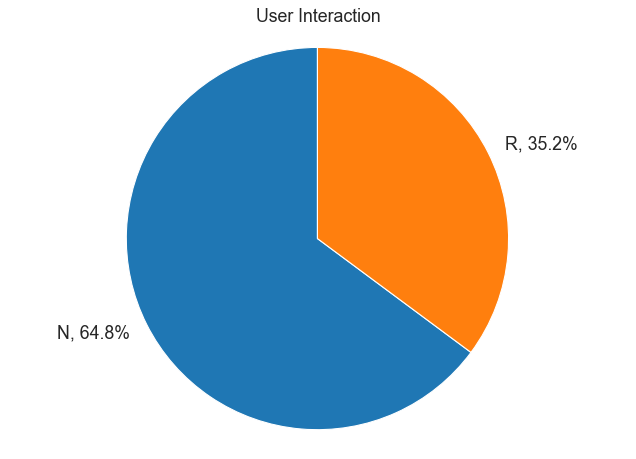

  ui  number
0  N   65969
1  R   35765


In [19]:
df_ui: DataFrame = df.groupby(by=['ui']).size().reset_index(name="number")
labels = df_ui['ui']
su = sum(df_ui['number'])
labels = [f'{l}, {(s/su)*100:1.1f}%' for l, s in zip(labels, df_ui['number'])]

print(df_ui.head())

fig, ax = plt.subplots(figsize=(10,7), dpi= 80)
ax.pie(df_ui['number'], labels=labels,startangle=90,textprops={'fontsize': 16})
#_, _, autotext = plt.pie(df_ui['number'], labels=labels, autopct='%1.1f%%', startangle=15)
#for t in autotext:
#    t.set_color('white')
plt.title('User Interaction', fontsize=16)
plt.axis('equal')
#plt.legend(title='Attuik Vector', labels=labels,)
plt.savefig('../assets/distribution_pies/ui_distribution.png')
plt.show()

print(df_ui)

   s  number
0  C   16951
1  U   84783


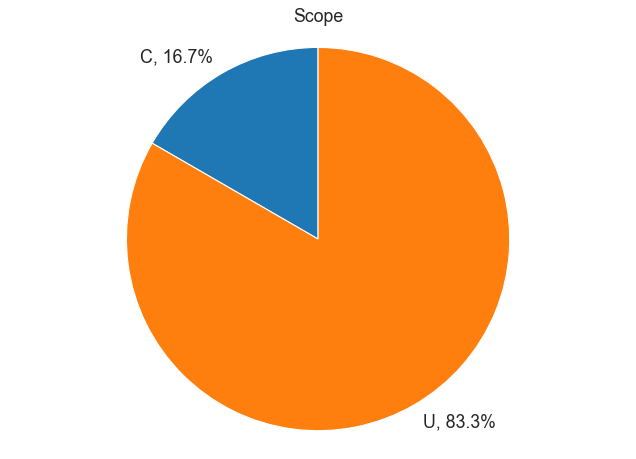

   s  number
0  C   16951
1  U   84783


In [20]:
df_s: DataFrame = df.groupby(by=['s']).size().reset_index(name="number")
labels = df_s['s']
su = sum(df_s['number'])
labels = [f'{l}, {(s/su)*100:1.1f}%' for l, s in zip(labels, df_s['number'])]

print(df_s.head())

fig, ax = plt.subplots(figsize=(10,7), dpi= 80)
ax.pie(df_s['number'], labels=labels, startangle=90,textprops={'fontsize': 16})
#_, _, autotext = plt.pie(df_s['number'], labels=labels, autopct='%1.1f%%', startangle=15)
#for t in autotext:
#    t.set_color('white')
plt.title('Scope', fontsize=16)
plt.axis('equal')
#plt.legend(title='Attuik Vector', labels=labels,)
plt.savefig('../assets/distribution_pies/s_distribution.png')
plt.show()

print(df_s)

   c  number
0  H   60272
1  L   19560
2  N   21902


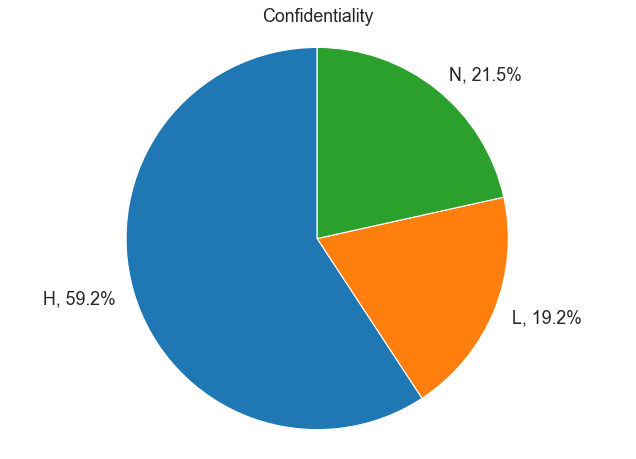

   c  number
0  H   60272
1  L   19560
2  N   21902


In [21]:
df_c: DataFrame = df.groupby(by=['c']).size().reset_index(name="number")
labels = df_c['c']
su = sum(df_c['number'])
labels = [f'{l}, {(s/su)*100:1.1f}%' for l, s in zip(labels, df_c['number'])]

print(df_c.head())

fig, ax = plt.subplots(figsize=(10,7), dpi= 80)
ax.pie(df_c['number'], labels=labels, startangle=90,textprops={'fontsize': 16})
#_, _, autotext = plt.pie(df_c['number'], labels=labels, autopct='%1.1f%%', startangle=15)
#for t in autotext:
#    t.set_color('white')
plt.title('Confidentiality', fontsize=16)
plt.axis('equal')
#plt.legend(title='Attck Vector', labels=labels,)
plt.savefig('../assets/distribution_pies/c_distribution.png')
plt.show()

print(df_c)

   i  number
0  H   51859
1  L   17607
2  N   32268


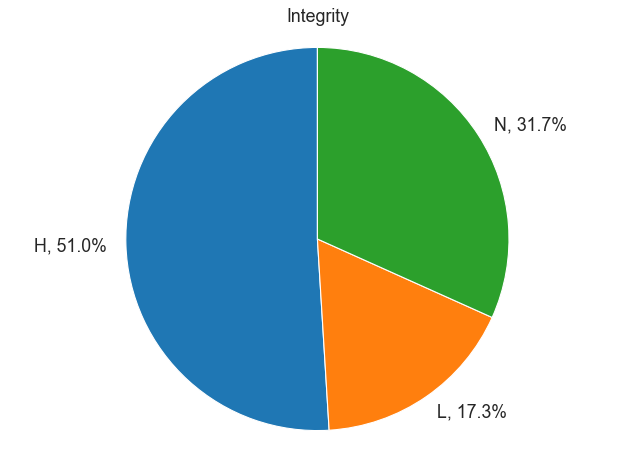

   i  number
0  H   51859
1  L   17607
2  N   32268


In [22]:
df_i: DataFrame = df.groupby(by=['i']).size().reset_index(name="number")
labels = df_i['i']
su = sum(df_i['number'])
labels = [f'{l}, {(s/su)*100:1.1f}%' for l, s in zip(labels, df_i['number'])]

print(df_i.head())

fig, ax = plt.subplots(figsize=(10,7), dpi= 80)
ax.pie(df_i['number'], labels=labels, startangle=90,textprops={'fontsize': 16})
#_, _, autotext = plt.pie(df_i['number'], labels=labels, autopct='%1.1f%%', startangle=15)
#for t in autotext:
#    t.set_color('white')
plt.title('Integrity', fontsize=16)
plt.axis('equal')
#plt.legend(title='Attik Vector', labels=labels,)
plt.savefig('../assets/distribution_pies/i_distribution.png')
plt.show()

print(df_i)

   a  number
0  H   60095
1  L    2724
2  N   38915


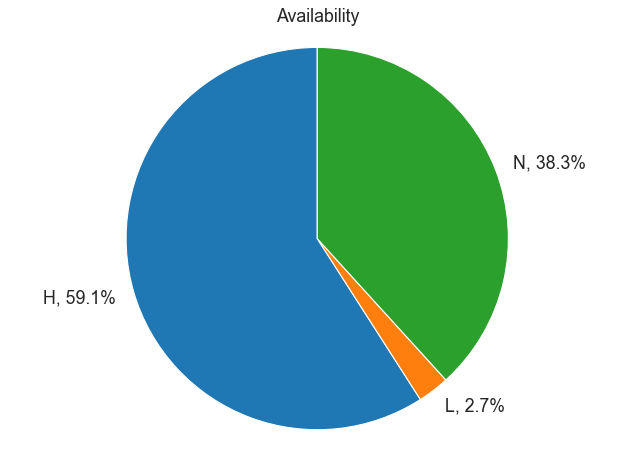

   a  number
0  H   60095
1  L    2724
2  N   38915


In [23]:
df_a: DataFrame = df.groupby(by=['a']).size().reset_index(name="number")
labels = df_a['a']
su = sum(df_a['number'])
labels = [f'{l}, {(s/su)*100:1.1f}%' for l, s in zip(labels, df_a['number'])]

print(df_a.head())

fig, ax = plt.subplots(figsize=(10,7), dpi= 80)
ax.pie(df_a['number'], labels=labels, startangle=90,textprops={'fontsize': 16})
#_, _, autotext = plt.pie(df_a['number'], labels=labels, autopct='%1.1f%%', startangle=15)
#for t in autotext:
#    t.set_color('white')
plt.title('Availability', fontsize=16)
plt.axis('equal')
#plt.legend(title='Attak Vector', labels=labels,)
plt.savefig('../assets/distribution_pies/a_distribution.png')
plt.show()

print(df_a)